# data augmentation

When we don't have enough training samples to cover diverse cases in image classification, often CNN might overfit. To address this we use a technique called data augmentation in deep learning. Data augmentation is used to generate new training samples from current training set using various transformations such as scaling, rotation, contrast change etc. I will classify flower images and see how the cnn model overfits. After that i will use data augmentation to generate new training samples and see how model performance improves.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# download flowers dataset fromm google
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= '.', untar= True)

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
# list all images with extension .jpg
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/184683023_737fec5b18.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3865206264_5d81584bba.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3912497888_e7a5905bc3_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2689228449_e0be72cf00_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7603036176_9e8967cd21.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4932736308_827012cff2.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9497774249_7f5ae70927_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/35477171_13cb52115c_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14925397351_c7f209d804_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8480886751_71d88bfdc0_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8928658373_fdca5ff1b8.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6606817351_10f6e43a09.jpg'),
 PosixPath('

In [7]:
#  display length of images
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/15424480096_45bb574b33.jpg'),
 PosixPath('datasets/flower_photos/roses/159079265_d77a9ac920_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/6347846687_3f0a7c3176.jpg'),
 PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'),
 Posix

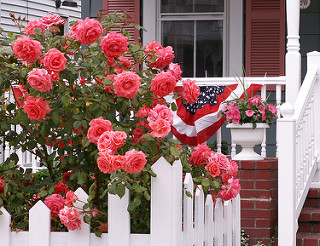

In [9]:
# show images using PIL module
PIL.Image.open(str(roses[1]))

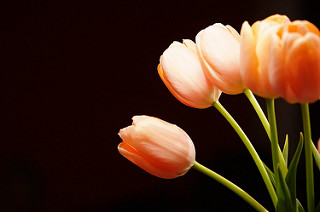

In [10]:
# show tulips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
# create class names with a dictionary with all paths associated with it
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')), 
    'sunflowers': list(data_dir.glob('sunflowers/*')), 
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/15424480096_45bb574b33.jpg'),
 PosixPath('datasets/flower_photos/roses/159079265_d77a9ac920_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/6347846687_3f0a7c3176.jpg'),
 PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'),
 Posix

In [13]:
flowers_images_dict['dandelion']

[PosixPath('datasets/flower_photos/dandelion/3589816063_50f8de7b64_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5655177340_78fc36ce59_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16650892835_9228a3ef67_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/13331969914_890082d898_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16241101274_334b54731e.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6060576850_984176cf4f_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17574213074_f5416afd84.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3393564906_f2df184b76_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5598845098_13e8e9460f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5749815755_12f9214649_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14084345111_8a4cb05a31.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18204150090_fb418bbddb.jpg'),
 PosixPath('data

In [14]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/5135131051_102d4878ca_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 PosixPath('datasets/flower_photos/daisy/8120563761_ed5620664f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20619292635_9857a12d54.jpg'),
 PosixPath('datasets/flower_photos/daisy/5459481183_18d2d49e44_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/8719756744_34a5a83976_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4278442064_a5a598524b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/8085329197_41d53a21e2_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5795159787_ebb51a5e75.jpg'),
 PosixPath('datasets/flower_photos/daisy/4923279674_e7f8e70794_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8932490012_cc08e690ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/12701063955_4840594ea6_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/525780443_bba812c26a_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/10993818044_4c19b86c82.jpg'),

In [15]:
# labels dictionaty
# randomly assign class numbers to each flower
flowers_labels_dict= {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

# Read flowers images from disk into numpy array using opencv

In [16]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/15424480096_45bb574b33.jpg'

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [18]:
# reshape image to std size
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [19]:
# for loop to resize our images and prep X and y
X, y =[], []

# first iterate thru all images
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    # resize
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    #y a number
    y.append(flowers_labels_dict[flower_name])

In [20]:
 y[:5]

[0, 0, 0, 0, 0]

In [21]:
X[0]

array([[[170, 142, 185],
        [173, 145, 188],
        [175, 148, 188],
        ...,
        [108, 100, 168],
        [ 97,  89, 161],
        [ 87,  77, 147]],

       [[170, 141, 186],
        [173, 145, 188],
        [175, 147, 189],
        ...,
        [106, 101, 171],
        [ 98,  91, 161],
        [ 87,  79, 143]],

       [[171, 140, 185],
        [174, 144, 188],
        [176, 146, 189],
        ...,
        [104, 102, 175],
        [ 99,  92, 165],
        [ 88,  79, 150]],

       ...,

       [[205, 169, 205],
        [200, 167, 202],
        [193, 159, 196],
        ...,
        [253, 230, 246],
        [241, 218, 237],
        [217, 190, 217]],

       [[204, 170, 204],
        [200, 167, 202],
        [192, 159, 196],
        ...,
        [250, 226, 243],
        [239, 213, 235],
        [213, 184, 216]],

       [[202, 169, 203],
        [200, 167, 202],
        [192, 160, 195],
        ...,
        [248, 222, 240],
        [234, 208, 232],
        [209, 177, 214]]

In [22]:
# convert list to numpy array
X = np.array(X)
y = np.array(y)

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [24]:
len(X_train)

2752

In [25]:
len(X_test)

918

In [26]:
# scalling
# divide rgb channels with 255
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
X_train_scaled[0]

array([[[0.01568627, 0.08235294, 0.03529412],
        [0.02745098, 0.10196078, 0.03137255],
        [0.00784314, 0.02745098, 0.01176471],
        ...,
        [0.07843137, 0.18823529, 0.07843137],
        [0.00784314, 0.10588235, 0.02352941],
        [0.01960784, 0.18823529, 0.0745098 ]],

       [[0.01568627, 0.1372549 , 0.05098039],
        [0.00784314, 0.09803922, 0.01176471],
        [0.00392157, 0.03529412, 0.00392157],
        ...,
        [0.06666667, 0.19215686, 0.08627451],
        [0.00784314, 0.11764706, 0.04705882],
        [0.05098039, 0.21176471, 0.10980392]],

       [[0.00392157, 0.15686275, 0.04313725],
        [0.        , 0.07058824, 0.        ],
        [0.00392157, 0.03137255, 0.01176471],
        ...,
        [0.04705882, 0.17254902, 0.0745098 ],
        [0.01568627, 0.1254902 , 0.06666667],
        [0.02352941, 0.15294118, 0.06666667]],

       ...,

       [[0.00784314, 0.04313725, 0.00784314],
        [0.01568627, 0.09019608, 0.03137255],
        [0.02352941, 0

Build convolutional neural network and train it


In [28]:
num_classes = 5 
# 5 neurons each corresponding to each flower


# building a model(CNN)
model = Sequential([
                    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),#16 filters with a size of 3*3
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
                    layers.MaxPooling2D(),
                    #Flatten from 2D to 1D
                    layers.Flatten(),
                    #1 hidden layer, a dense 
                    layers.Dense(128, activation= 'relu'),
                    layers.Dense(num_classes)  # number of flowers no activation means it uses default activation= 'linear'
                    
                    
])


model.compile(optimizer= 'adam',
              loss= tf.kera.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics= ['accuracy'])


model.fit(X_train_scaled, y_train, epochs= 30)

Epoch 1/30
86/86 [==============================] - 16s 20ms/step - loss: 1.2252 - accuracy: 0.4858
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9049 - accuracy: 0.6512
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7039 - accuracy: 0.7318
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5135 - accuracy: 0.8089
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.2936 - accuracy: 0.9026
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1578 - accuracy: 0.9542
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0922 - accuracy: 0.9757
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0550 - accuracy: 0.9811
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0712 - accuracy: 0.9797
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0372 - accuracy: 0.9920
Epoch 11

high accuracy of 1

In [29]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 17ms/step - loss: 2.8633 - accuracy: 0.6786


[2.8633005619049072, 0.6786492466926575]

accuracy= 0.6786...

clear overfitting

does well in training and poorly in testing

make some predictions before using data augmentation to address overfitting

In [32]:
predictions = model.predict(X_test_scaled)
predictions

array([[-20.890186 ,   1.1237104,  -9.634502 ,  -9.409747 ,  -7.3273134],
       [ 14.701891 , -21.84639  , -19.261774 ,  -7.8533792,   1.6113275],
       [-15.29166  ,  -8.28947  ,  -1.6727037,  10.294798 ,  -8.673754 ],
       ...,
       [-12.957694 ,   1.5897155,   6.4386005,  -4.5068526,  -4.0777674],
       [ -1.7704039,  -4.94344  ,  -4.5425763,  -4.875035 ,   8.672056 ],
       [ -8.344937 ,  -1.4646757,  -1.0365677, -11.270447 ,   1.7758381]],
      dtype=float32)

In [47]:
# CONVERT NUMPY ARRAY TO SET OF PROBABILITY SCORES
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.7502517e-10, 9.9973851e-01, 2.1264435e-05, 2.6623422e-05,
       2.1362561e-04], dtype=float32)>

In [48]:
#  use argmax funnction to gget index of maximum element
np.argmax(score)

1

In [49]:
y_test[1]

0

# Improve Test Accuracy Using Data Augmentation

In [68]:
# keras.Sequential([
#                   layers.experimental.preprocessing.RandomFlip("horizontal",
#                                                                input_shape=(img_height,
#                                                                             img_width,
#                                                                             3)),
#                   layers.experimental.preprocessing.RandomRotation(0.1),
#                   layers.experimental.preprocessing.RandomZoom(0.1)

# ])

In [51]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomZoom(0.3)
])

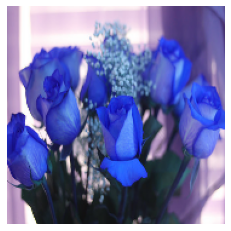

In [50]:
plt.axis('off')
plt.imshow(X[0])

In [52]:
# apply augmentation
# call as function
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[250, 234, 237],
        [224, 197, 216],
        [196, 163, 201],
        ...,
        [100,  94, 165],
        [100,  96, 166],
        [100,  97, 165]],

       [[250, 234, 237],
        [224, 197, 216],
        [196, 163, 200],
        ...,
        [100,  91, 162],
        [ 99,  93, 163],
        [100,  95, 165]],

       [[250, 234, 237],
        [223, 196, 216],
        [195, 162, 199],
        ...,
        [ 97,  86, 158],
        [ 98,  89, 160],
        [ 99,  93, 163]],

       ...,

       [[193, 157, 197],
        [192, 156, 198],
        [189, 153, 194],
        ...,
        [254, 235, 246],
        [254, 235, 246],
        [252, 236, 246]],

       [[193, 156, 197],
        [192, 156, 198],
        [189, 153, 195],
        ...,
        [253, 229, 244],
        [253, 230, 245],
        [252, 231, 245]],

       [[193, 157, 199],
        [192, 157, 198],
        [189, 153, 195],
        ...,
        [250, 225, 24

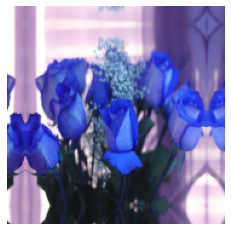

In [55]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

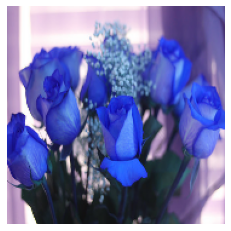

In [56]:
plt.axis('off')
plt.imshow(X[0])

In [57]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomContrast(0.9)
])

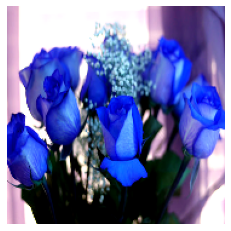

In [58]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [61]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomRotation(0.5)
])

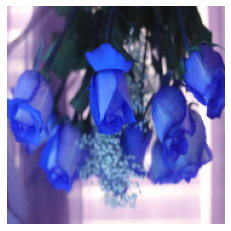

In [63]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

producing new samples with data augmentation

In [76]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [77]:
num_classes = 5

model = Sequential([
  data_augmentation, #produce new samples
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #drop 20% of neurons at each pass giving better generalization
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 3s 23ms/step - loss: 1.3310 - accuracy: 0.4237
Epoch 2/30
86/86 [==============================] - 2s 22ms/step - loss: 1.0501 - accuracy: 0.5778
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9296 - accuracy: 0.6414
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8651 - accuracy: 0.6635
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8057 - accuracy: 0.6802
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7476 - accuracy: 0.7068
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7237 - accuracy: 0.7198
Epoch 8/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6880 - accuracy: 0.7307
Epoch 9/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6476 - accuracy: 0.7569
Epoch 10/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6319 - accuracy: 0.7558
Epoch 11/

In [78]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 12ms/step - loss: 0.9899 - accuracy: 0.7200


[0.9898838996887207, 0.7200435996055603]

accuracy improved from 67.86% to 72%